In [1]:
from IPython.core.display import HTML

def _set_css_style(css_file_path):
   """
   Read the custom CSS file and load it into Jupyter.
   Pass the file path to the CSS file.
   """

   styles = open(css_file_path, "r").read()
   s = '<style>%s</style>' % styles     
   return HTML(s)

_set_css_style('rise.css')

# Data analysis principles and `pandas`

<a href="?print-pdf">print view</a><br>
<a href="lecture-10-pandas.ipynb">notebook</a>

* Storing and analyzing data  
* Tidy data principles  
* Data handling best practices
* Tidying with `pandas` 

## Questions about data

Why store data?  

**Analysis** -- we want to learn something from the data

* By ourselves, for our own work
* To share with others, along with interpretations

**Record keeping**

To meet these needs, data should be **easy to interpret** and **easy to use**

## Project

What does this data set describe?  

https://mscbio2025-2024.github.io/files/test.csv

## A case study

>... a realistic example of tabular data in the wild: It contains redundant columns, odd variable codes, and many missing values. In short, \[this dataset\] is messy.  

Garrett Grolemund (http://garrettgman.github.io/tidying/)  

## What *does* it mean?

This data set describes confirmed cases of tuberculosis (TB) gathered by the WHO  

Cases are sorted by country, age, and sex  

## A better way: tidy data

Organizing principles for storing data (see work by Hadley Wickham)

* Each variable forms a column

* Each observation forms a row

* Each value is placed in its own cell

## Tidy data  

![tidy data](images/tidy.png)

Image: Garett Grolemund

## Best practices for data analysis

* Keep a copy of raw data in whatever format it is generated or received  

* If at all possible, **never** manipulate raw data by hand (e.g., copy and paste b/w docs)  

* Instead, write and save code to process data

* Record all steps of analysis, including code and versions of software used, so that the entire process is reproducible  

## Jupyter notebook example

For most packages, `__version__` records the version  

In [2]:
print('This notebook was prepared using:')

import sys, os
print('python version %s' % sys.version)

import numpy as np
print('numpy version %s' % np.__version__)

This notebook was prepared using:
python version 3.10.15 | packaged by conda-forge | (main, Sep 20 2024, 16:34:16) [Clang 17.0.6 ]
numpy version 1.26.4


## More guidelines

* Store paths to data, parameters as (global) variables rather than hard-coding  

* Use clear variable names and transparently pass parameters to functions  

* Often useful to distinguish global from local variables (e.g., global in ALL_CAPS)  

* A neat trick: use dictionaries to pass many named variables at once

```python
my_params = dict(my_number=2, x=7, filename='myfile.dat')  
my_function(**my_params)
```

## (Highly condensed) Jupyter notebook example

```python
import my_code

raw_path = 'files/raw/my_data.csv'  
processed_path = 'files/processed/processed_data.csv'  
output_path = 'files/analysis/my_results.csv'  
my_parameter = 7

my_code.process_data(in_file=raw_path, out_file=processed_path, setting=my_parameter)
my_code.generate_results(in_file=processed_path, out_file=output_path)
my_code.plot_results(in_file=output_path)
```

## Comma-separated values (CSV)

* Entries separated by commas  
* Rows separated by new line `\n` characters  
* The first row gives the names of the variables

* Can be **tidy**
    * Each variable is a column
    * Each observation is a row  
    * Each value in its own cell  

```
country,year,cases,population
Afghanistan,1999,745,19987071
Brazil,2000,2666,172006362
```

## `pandas`

`pandas` provides a fast, flexible interface for working with “relational” or “labeled” data that is easy and intuitive  

`pandas` can read and store compressed data automatically, which is a **big deal**  

Especially useful for large data sets with **mixed types**  

## Example: the `iris` dataset in `seaborn`

Data in `pandas` is stored in `DataFrame` objects that can be manipulated in many ways  

`iris` stores measurements of different flower species  

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

df = sns.load_dataset('iris')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## Basic data frame checks

In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
len(df)

150

## Showing the relationships between variables

How are petal and sepal lengths related?

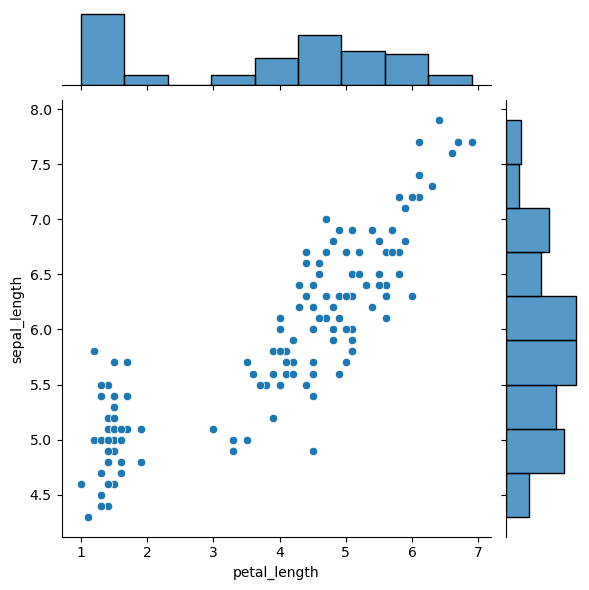

In [6]:
sns.jointplot(data=df, x='petal_length', y='sepal_length');

## Selecting subsets

In [7]:
print(np.unique(df.species))

['setosa' 'versicolor' 'virginica']


Is the relationship between petal and sepal length different for different species?

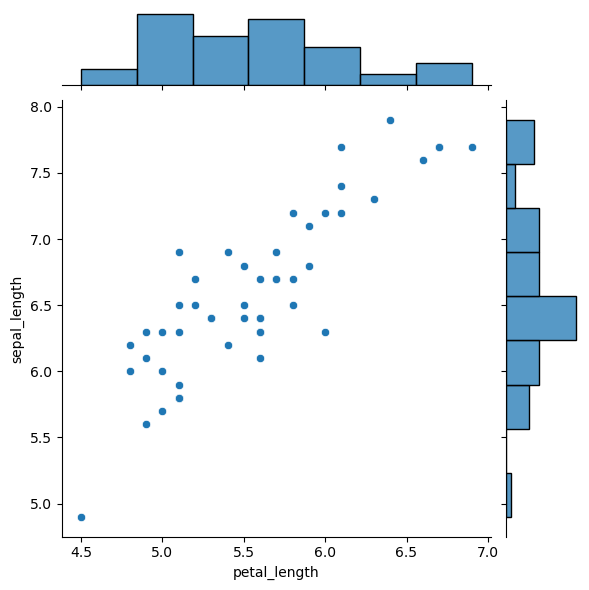

In [10]:
df_setosa     = df[df['species']=='setosa']
df_versicolor = df[df.species=='versicolor']
df_virginica  = df[df.species=='virginica']

sns.jointplot(data=df_virginica, x='petal_length', y='sepal_length');

## Visualizing multiple variables at once

Because the data is stored in a simple format, it is easy to quickly relate many variables  

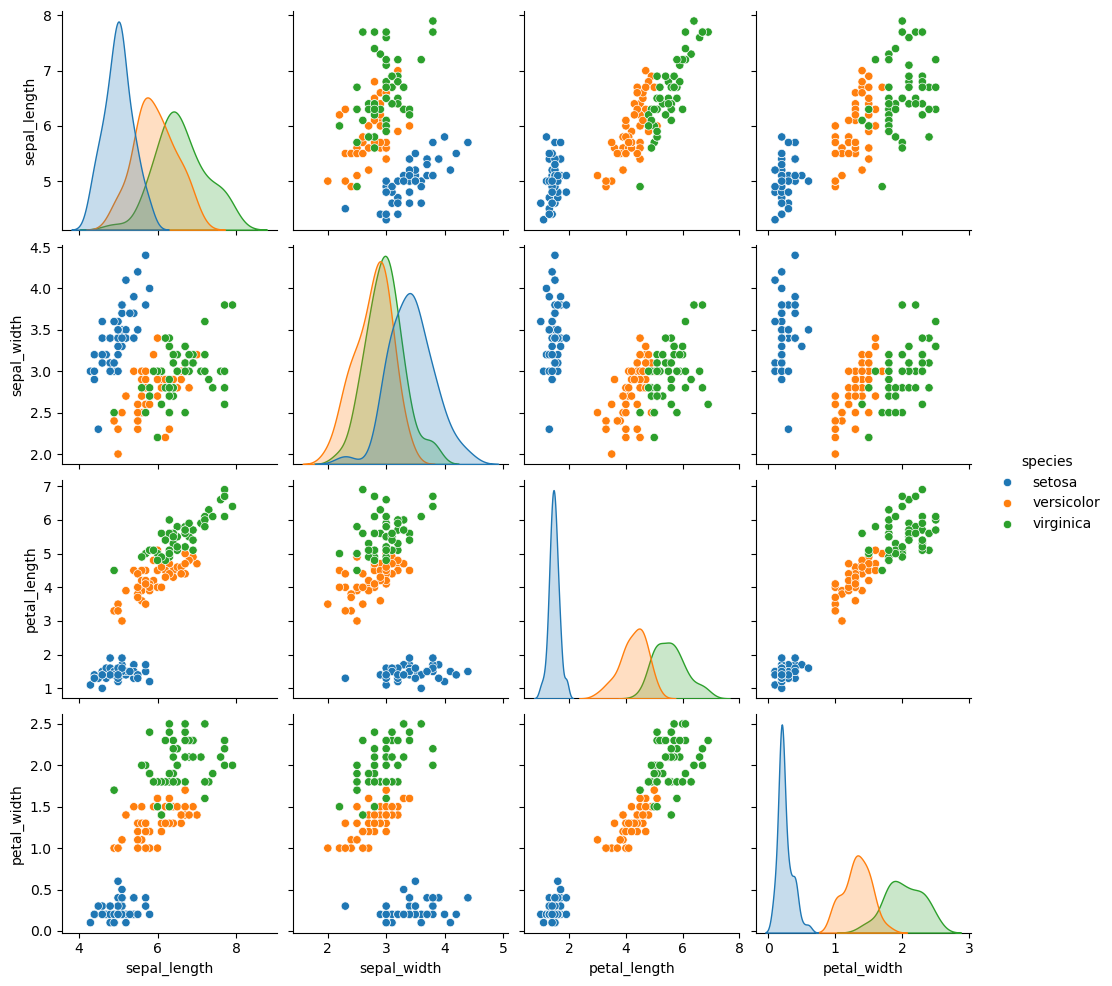

In [11]:
sns.pairplot(data=df, hue='species');

## A quick test on another data set

`planets` contains information about recently discovered planets  

In [12]:
df = sns.load_dataset('planets')
df.head(10)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008
6,Radial Velocity,1,1773.400,4.64,18.15,2002
7,Radial Velocity,1,798.500,NaN,21.41,1996
8,Radial Velocity,1,993.300,10.30,73.10,2008
9,Radial Velocity,2,452.800,1.99,74.79,2010


## How is the year the planet was discovered related to its distance from the solar system?

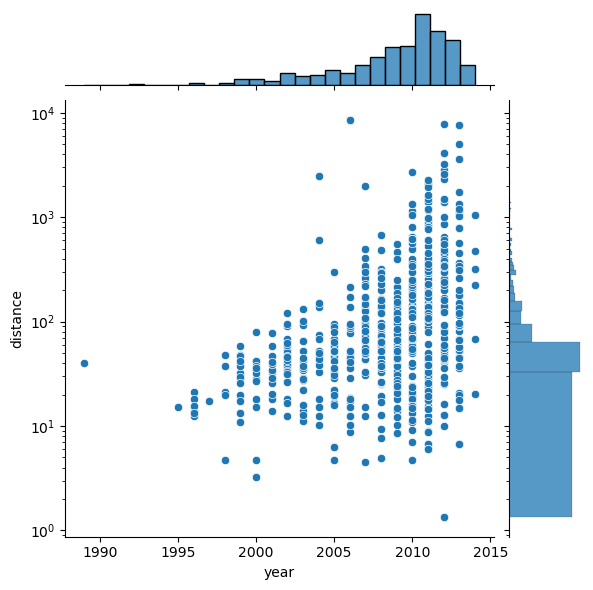

In [13]:
sns.jointplot(data=df, x='year', y='distance')
plot.yscale('log')

## Discovery methods vs. time

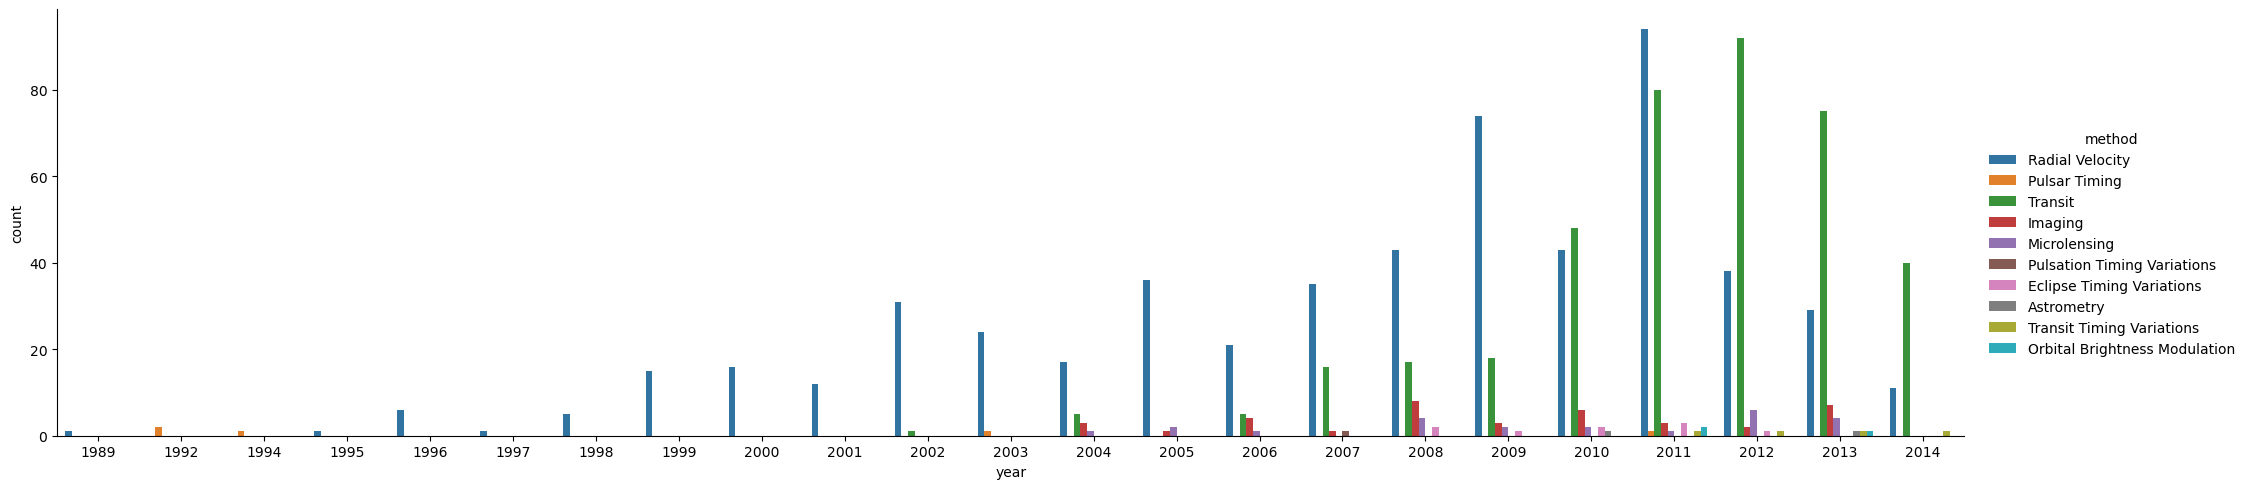

In [14]:
sns.catplot(data=df, x='year', kind='count', aspect=4, hue='method');

## Example: Tidying the TB dataset

Let's use `pandas` to load the data set and clean it for analysis   

For this and other examples, check [here](http://www.jeannicholashould.com/tidy-data-in-python.html)  

FYI: `iso2` refers to the [two-digit country code](https://www.nationsonline.org/oneworld/country_code_list.htm) for different countries  

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/hadley/tidy-data/master/data/tb.csv')
df.head(10)

## 'Melting' the data set

First, extract age range and sex from columns  
All values are stored as 'cases'  

In [ ]:
df = pd.melt(df, id_vars=['iso2', 'year'], value_name='cases', var_name='sex_and_age')
df.head(10)

## Parsing the data

In [ ]:
# Parse the column names to extract sex, age upper and lower bounds
tmp_df = df['sex_and_age'].str.extract('(\D)(\d+)(\d{2})')    

# Add new columns for these variables
tmp_df.columns = ['sex', 'age_lower', 'age_upper']

# Create a single `age` column using `age_lower` and `age_upper`
tmp_df['age'] = tmp_df['age_lower'] + '-' + tmp_df['age_upper']

# Merge the data frames together
df = pd.concat([df, tmp_df], axis=1)

df.head(10)

## Reformatting and generating useful variables

In [ ]:
# Drop unnecessary columns and rows
df = df.drop(['sex_and_age', 'age_lower', 'age_upper'], axis=1)
df = df.dropna()

# Rename `iso2` to `country`
df = df.rename(index=str, columns={'iso2': 'country'})

# Sort the data frame
df = df.sort_values(['country', 'year', 'sex', 'age'], ascending=True)
df.head(10)

## Project

Download the data set (https://mscbio2025-2024.github.io/files/test.csv) and run the steps above, then analyze the data  

* What is the trend in TB cases among males in the US over time?  
* In 2000, which country had the most TB cases among females?  
* Plot the total number of TB cases over time for four countries of your choice (due to large differences in population, you may want to use a log scale)

Download the gene expression data set that we used earlier in the course (https://mscbio2025-2024.github.io/files/Spellman.csv)

* Write a script to convert this data set into a "tidy" format and save it to a new file (`Spellman-tidy.csv`)
* Read in the new file and plot the expression of the YBR207W gene over time    
* Print out the list of genes that have negative expression values at both $t=100$ and $t=200$  

Discuss with a neighbor: what kind of data do you encounter in your research? How could you make it easier to store and analyze?  

In [ ]:
df_US = df[(df.country=='US') & (df.sex=='m')]
df_US.head(5)

In [ ]:
sns.lineplot(data=df_US, x='year', y='cases', hue='age');

In [ ]:
df_2000f = df[(df.year==2000) & (df.sex=='f')]
countries = np.unique(df_2000f.country)
cases = [np.sum(df_2000f[df_2000f.country==c].cases) for c in countries]
cmax = np.argmax(cases)
print(countries[cmax], cases[cmax])

In [ ]:
import matplotlib.pyplot as plt

countries = ['CN', 'US', 'GB', 'MX']

for c in countries:
    df_sub = df[df.country==c]
    years  = np.sort(np.unique(df_sub.year))
    cases  = [np.sum(df_sub[df_sub.year==y].cases) for y in years]
    plt.plot(years, cases, label=c)

plt.legend()
plt.yscale('log')
plt.show()

## For next time

More data analysis with `pandas`    
Electronic medical records  